In [1]:
import networkx as nx
import seaborn as sns
import numpy as np
import pandas as pd
from operator import itemgetter

In [2]:
import powerlaw as pwl
from collections import Counter
import glob

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# PowerLaw and Scale-Free Test

### Dataset

The first part of our data analysis focuses on the study of the type of network we have created.

We expect that our network is a scale-free network and the definition is the following:

$$\textit{"A scale-free network is
a network whose}$$ 
$$\textit{degree 
distribution follows a power law."}$$

According to this definition it's important to study the power-law distribution.

Let's start by taking the dataset from our simulations. We have 10 different dataset from 10 different simulation of our network. We set 100000 agents.

For an easier manipulation in python we used .txt file.

In [4]:
filepath = r"C:\Users\Proprietario\Desktop\SLAPP\SLAPP3-master\6 objectSwarmObserverAgents_AESOP_turtleLib_NetworkX\Analisi 1" # use your path
all_files = glob.glob(filepath + "/*.txt")
G = {}
j = 0

for filename in all_files:
    G[j]=nx.DiGraph()
    fh=open(filename,'r')
    for i, line in enumerate(fh):
        s=line.strip()
        s=s.strip(";").split()
        if (i>6) and (s[0] != 'label') and (s[0] != '}') and (s[1] != '[style=filled,'):
            origin=int(s[0])
            dest=int(s[2])
            G[j].add_edge(origin,dest)
    fh.close()
    j += 1

The following part checks nodes and links of our network at every simulation.

In [5]:
for i in range (len(G)):
    print('The network has', len(G[i]), 'nodes and', len(G[i].edges()), 'links.')

The network has 100000 nodes and 2216935 links.
The network has 100000 nodes and 2076530 links.
The network has 100000 nodes and 2544223 links.
The network has 100000 nodes and 2479325 links.
The network has 100000 nodes and 2101849 links.
The network has 100000 nodes and 2589901 links.
The network has 100000 nodes and 2252713 links.
The network has 100000 nodes and 2135221 links.
The network has 100000 nodes and 2909948 links.


### Degree Distribution - Probability Mass Function

Let's plot the degree distribution of the network. In this section we start by checking that the in-degree distribution and the out-degree distribution are not the same during the initial setting operations of the network. Clearly we will perform the plot of the probability mass function that it come from a discrete problem. It's important to keep in mind the differences between the probability density function and the probability mass function.

In [6]:
degrees_in = {}
degrees_out = {}
deg_distri_in = {}
deg_distri_out = {}

for i in range (len(G)):
    degrees_in[i] = dict(G[i].in_degree()).values()
    deg_distri_in[i] = Counter(degrees_in[i])
    degrees_out[i] = dict(G[i].out_degree()).values()
    deg_distri_out[i] = Counter(degrees_out[i])

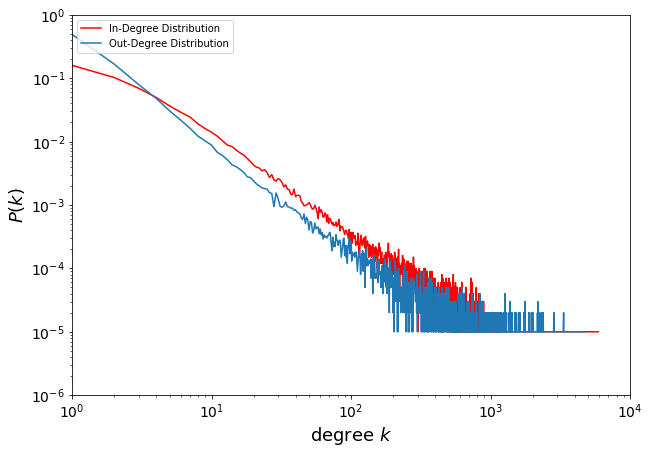

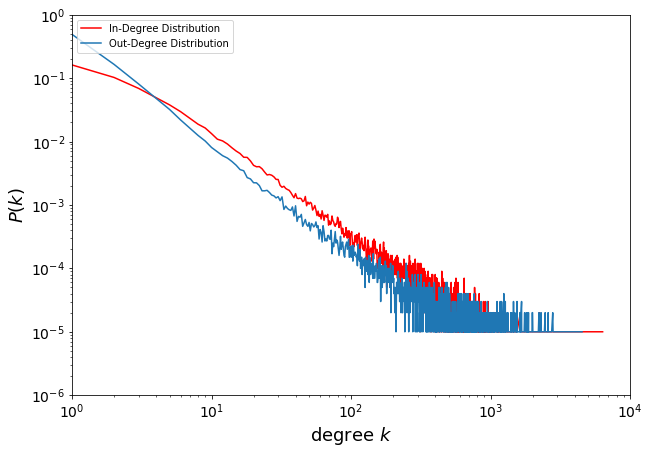

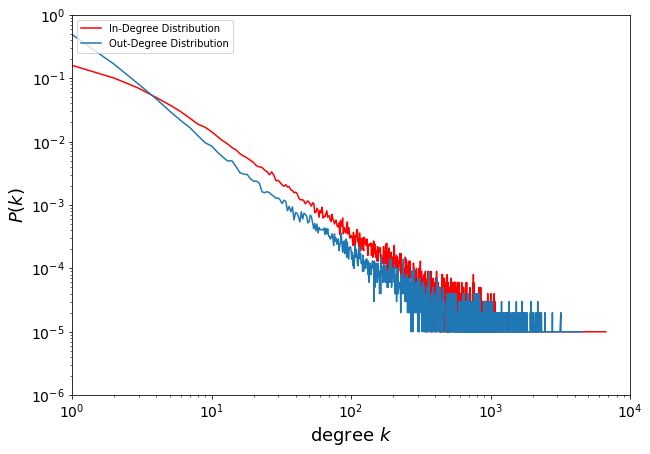

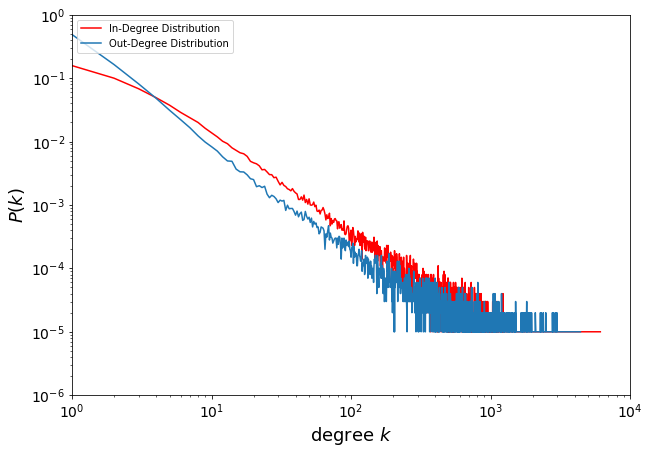

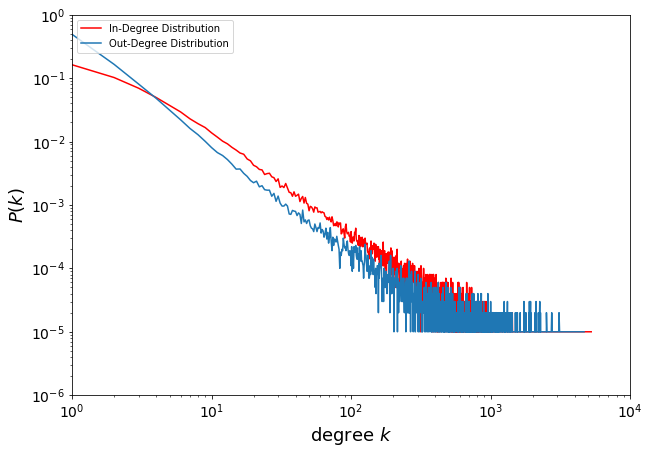

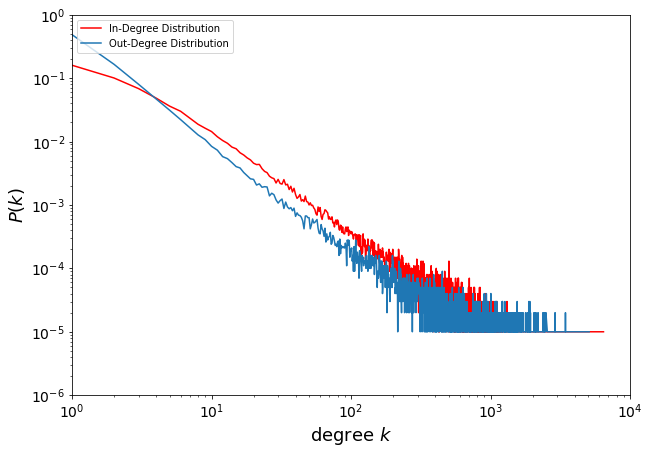

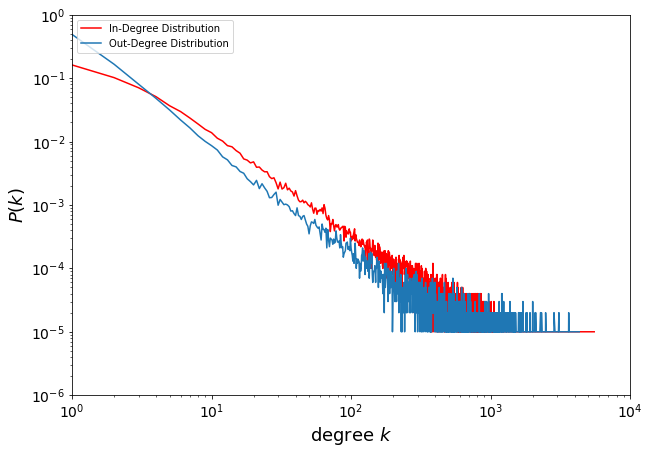

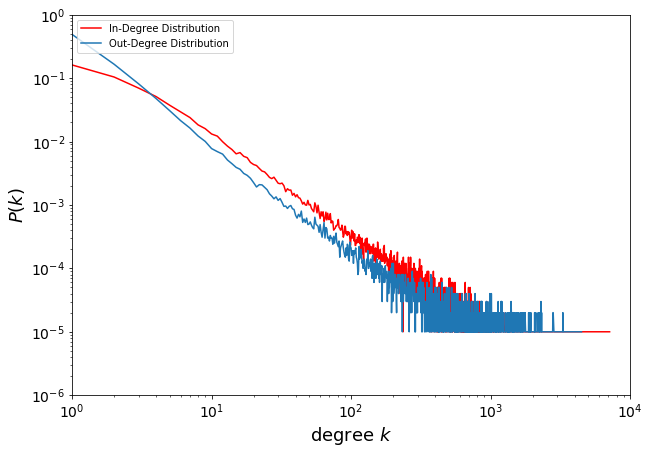

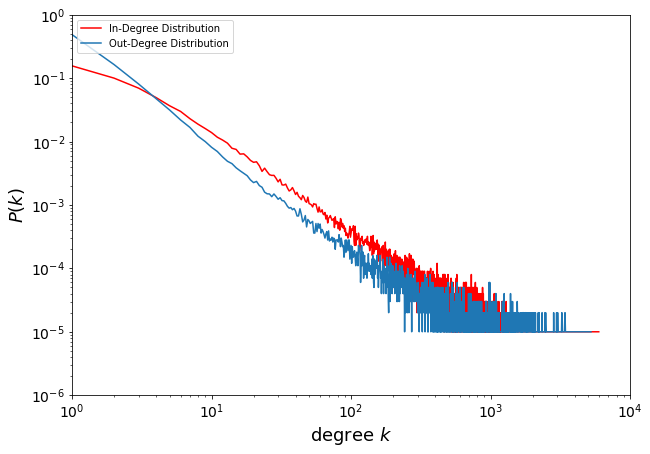

In [7]:
x_in = {}
y_in = {}
x_out = {}
y_out = {}
j = 0

for filename in all_files:
    x_in['File' + str(j)] = []
    y_in['File' + str(j)] = []
    x_out['File' + str(j)] = []
    y_out['File' + str(j)] = []
    
    for i in sorted(deg_distri_in[j]):   
        x_in['File' + str(j)].append(i)
        y_in['File' + str(j)].append(deg_distri_in[j][i]/len(G[j]))
        
    for i in sorted(deg_distri_out[j]):
        x_out['File' + str(j)].append(i)
        y_out['File' + str(j)].append(deg_distri_out[j][i]/len(G[j]))
        
    plt.figure(figsize=(10,7))    
    plt.plot(x_in['File' + str(j)],y_in['File' + str(j)], 'r' ,label='In-Degree Distribution')
    plt.plot(x_out['File' + str(j)],y_out['File' + str(j)], label='Out-Degree Distribution')
    plt.legend(loc='upper left')
    
    plt.xlabel('degree $k$', fontsize=18)
    plt.ylabel('$P(k)$', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.yscale('log')
    plt.xscale('log')
    plt.axis([1,10000,0.000001,1])
    plt.show()
    j += 1

Now that the in-degree distribution and the out-degree distribution are not the same, we can consider every degree of a node and plot the degree distribution.

In [8]:
deg = {}
deg_distri = {}

for i in range (len(G)):
    deg[i] = dict(G[i].degree()).values()
    deg_distri[i] = Counter(deg[i])

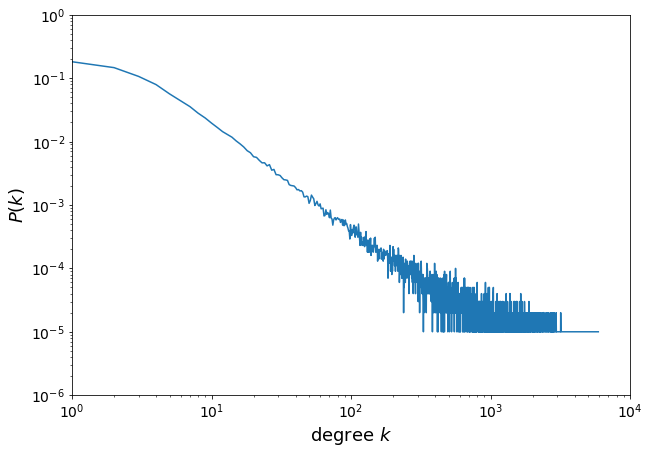

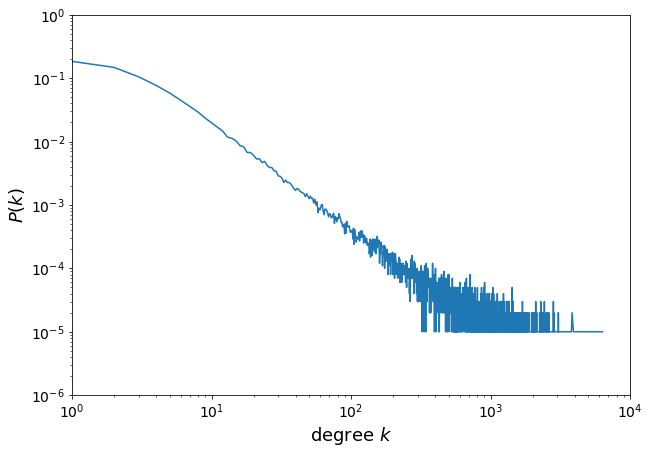

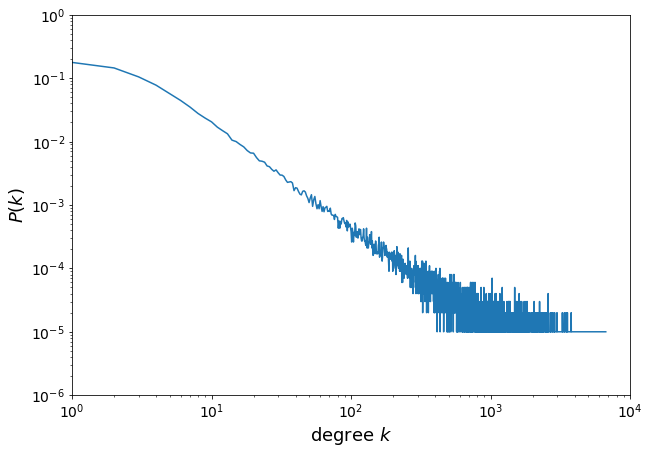

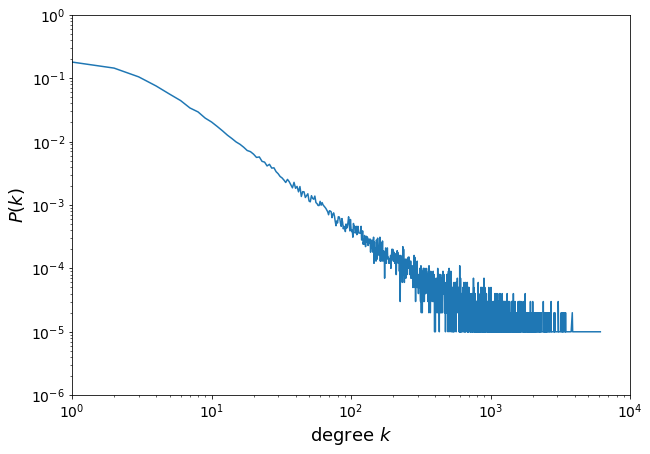

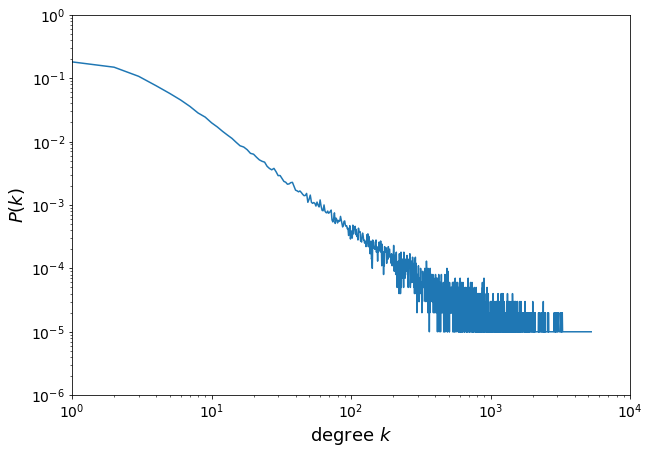

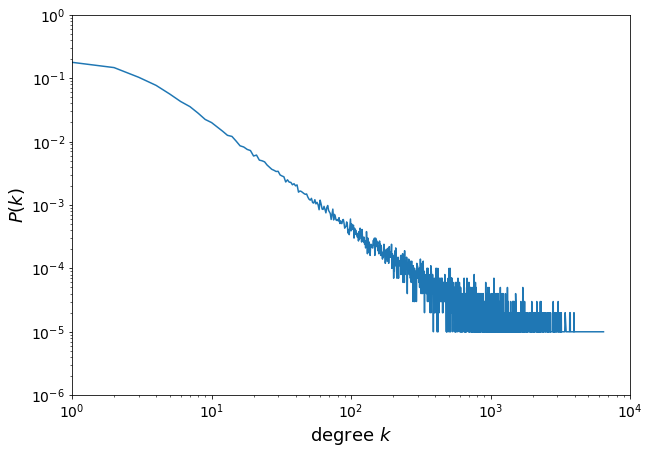

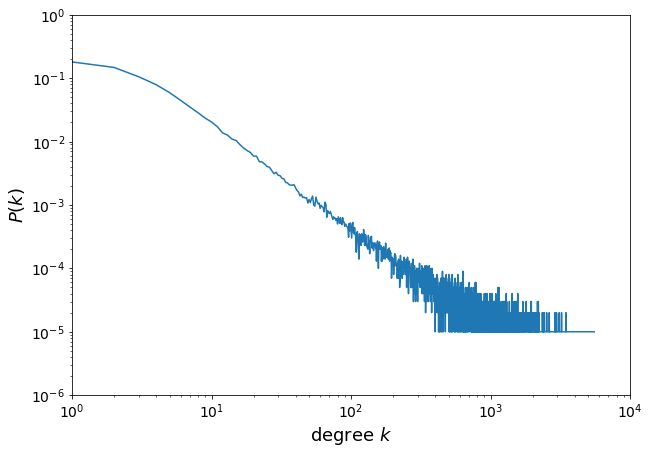

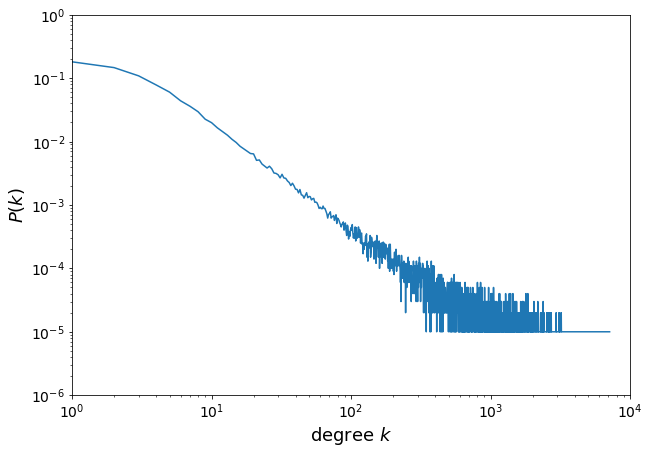

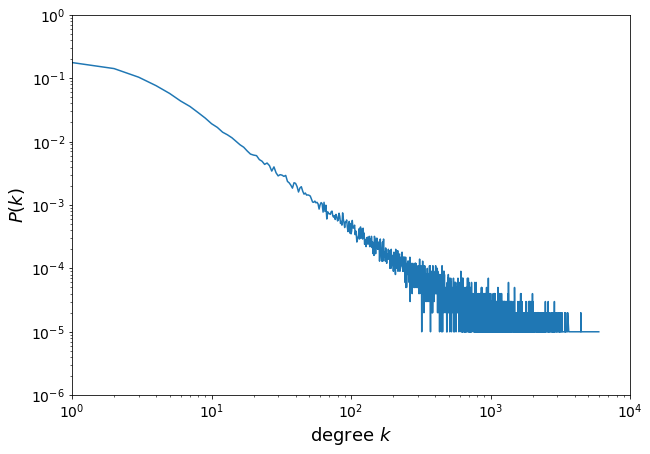

In [9]:
x = {}
y = {}
j = 0

for filename in all_files:
    x['File' + str(j)] = []
    y['File' + str(j)] = []

    for i in sorted(deg_distri[j]):   
        x['File' + str(j)].append(i)
        y['File' + str(j)].append(deg_distri[j][i]/len(G[j]))

    plt.figure(figsize=(10,7))    
    plt.plot(x['File' + str(j)],y['File' + str(j)])

    plt.xlabel('degree $k$', fontsize=18)
    plt.ylabel('$P(k)$', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.yscale('log')
    plt.xscale('log')
    plt.axis([1,10000,0.000001,1])
    plt.show()
    j += 1

### Histogram of the Probability Density Function

Using the 'hist()' function of matplotlib we can plot the probability density distribution, choosing the number of bins. We set the binning logaritmical. 

We checked this distribution with the previous one.

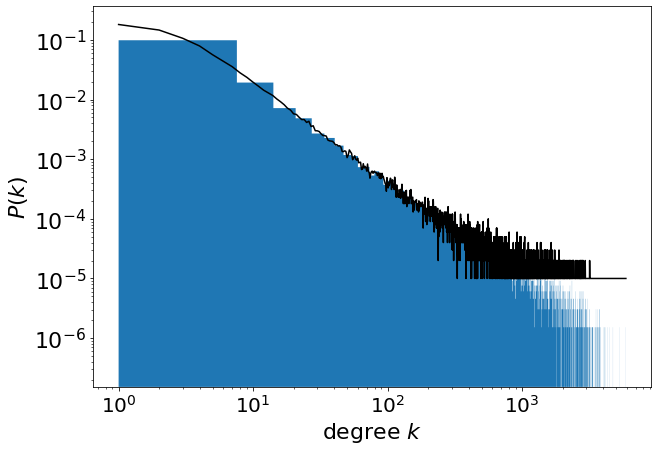

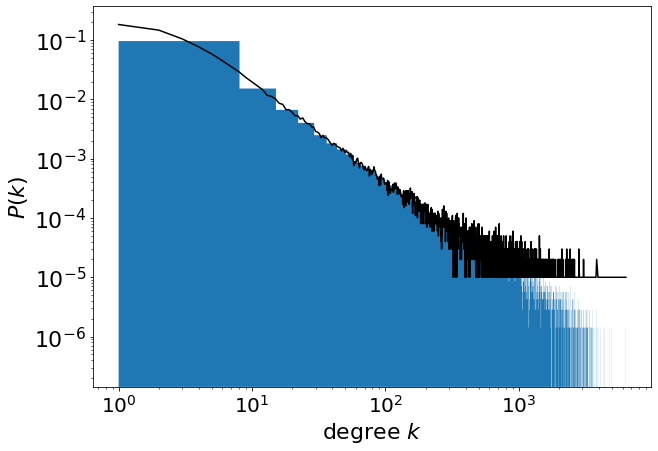

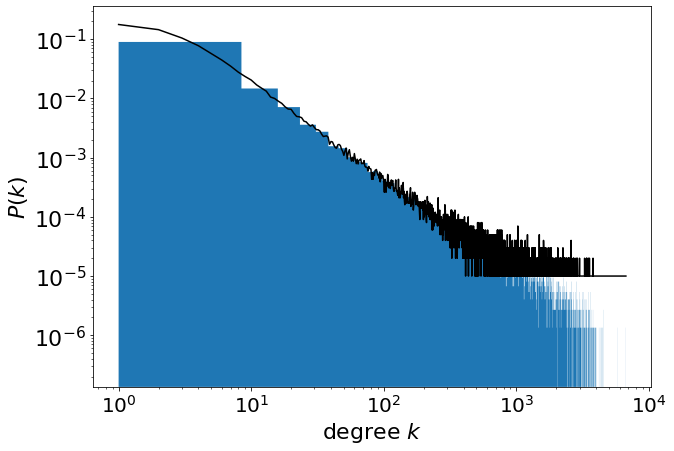

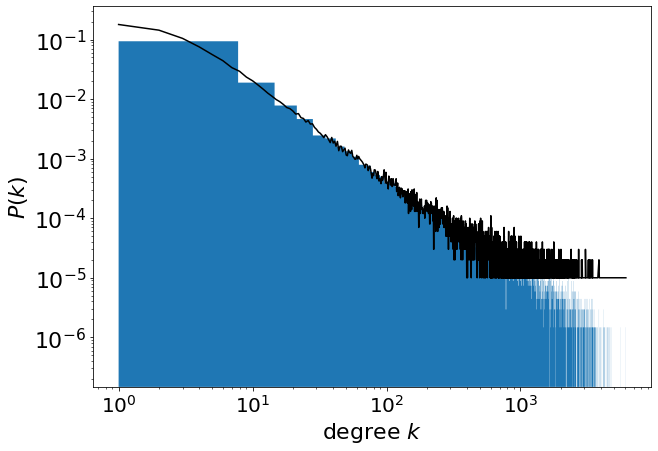

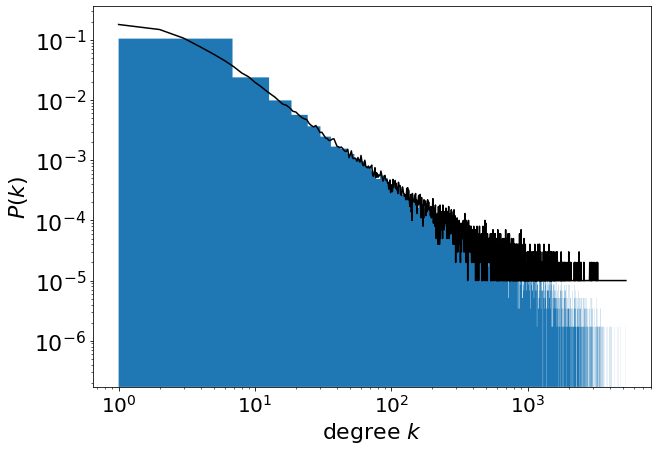

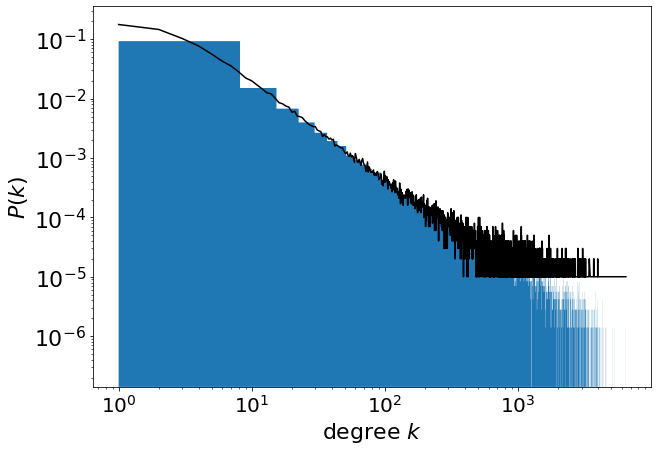

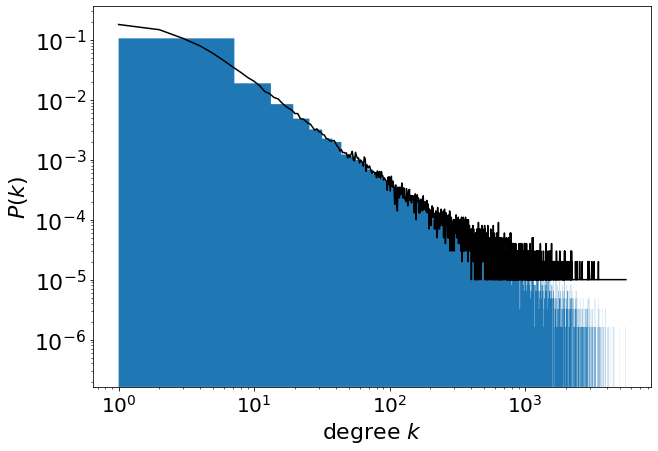

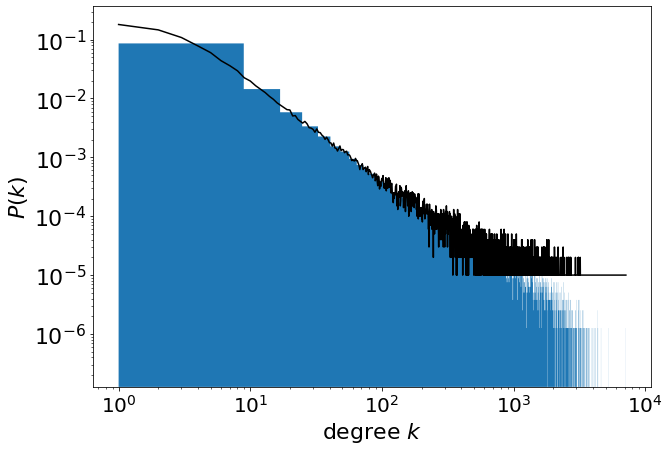

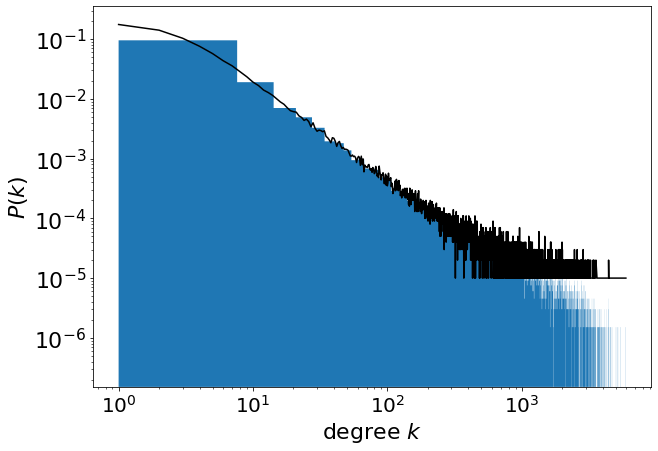

In [10]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.hist(deg[j], bins=900, density=True, log=True, histtype='stepfilled')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'black','o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)
    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

At the end of the distribution the tail is very low because the probability is low.

The *powerlaw* package provides direct access to the probability density function.

### Probability Density Function

In [11]:
degree = {}
degree_in_1 = {}
pwl_distri = {}
j = 0

for filename in all_files:
    degree[j]=list(deg[j])
    degree_in_1[j]=list(degrees_out[j])
    pwl_distri[j]=pwl.pdf(degree[j], bins=90)
    j += 1

Let's plot the probability density function:

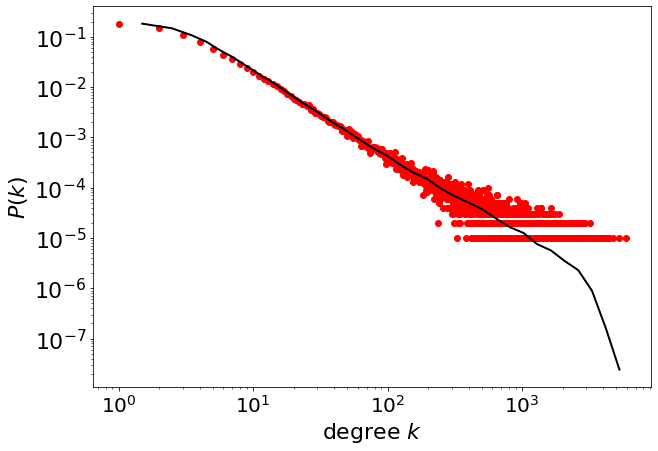

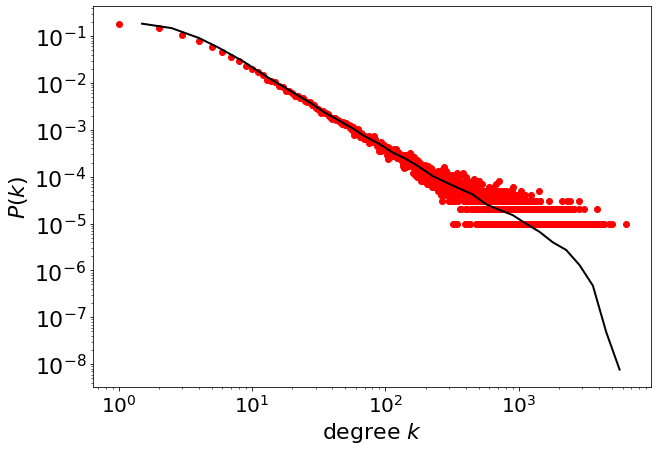

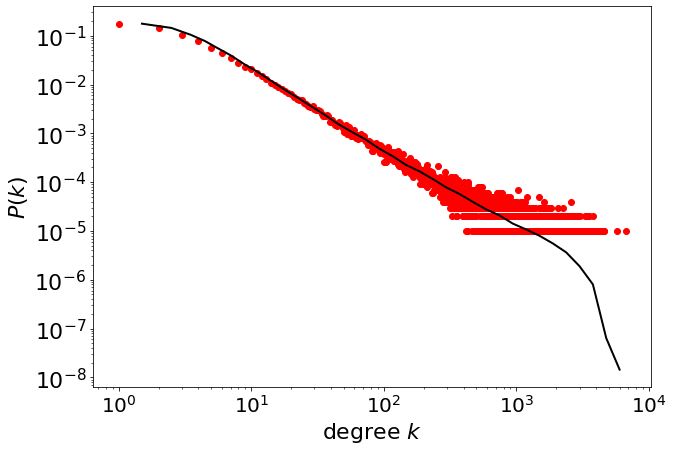

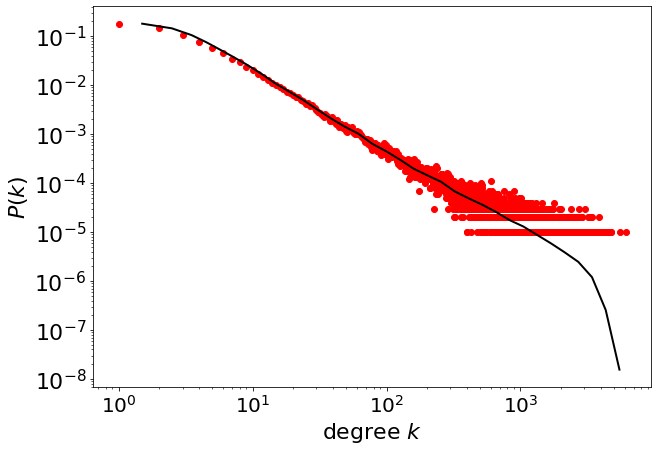

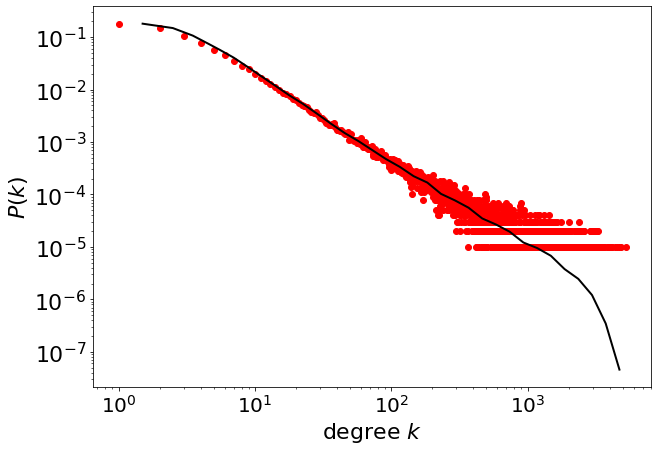

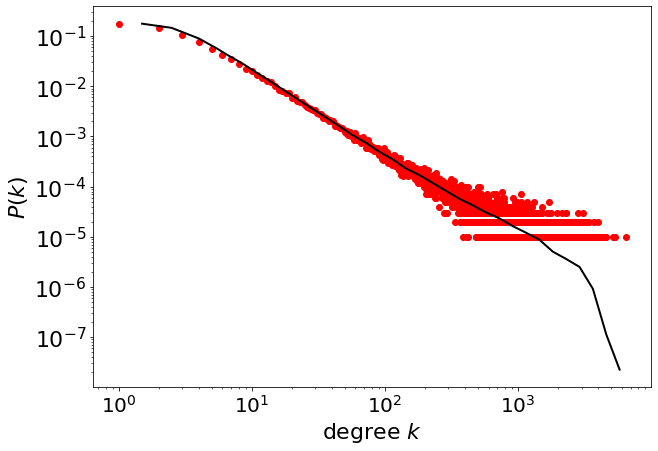

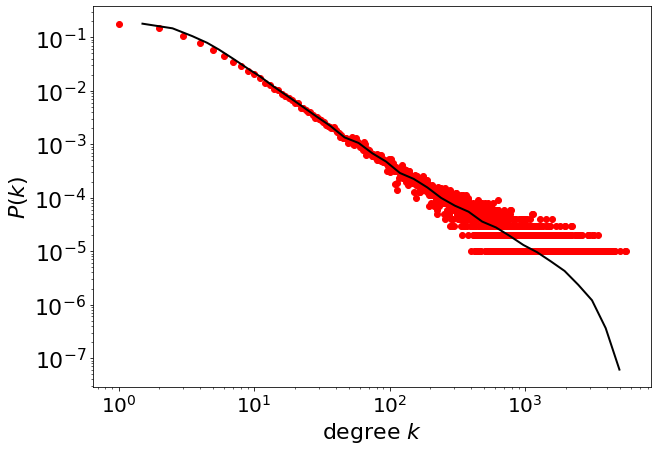

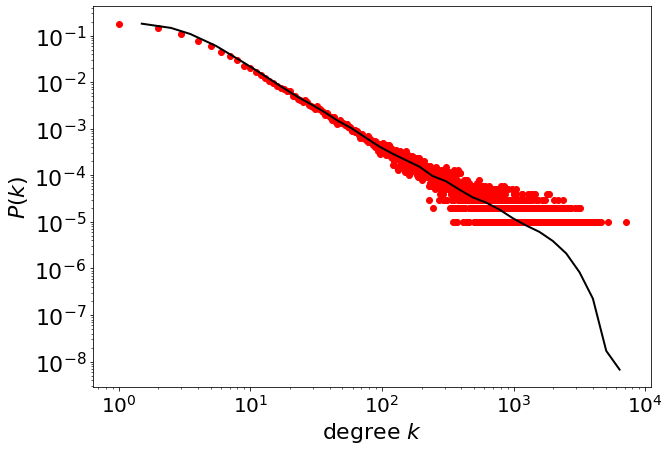

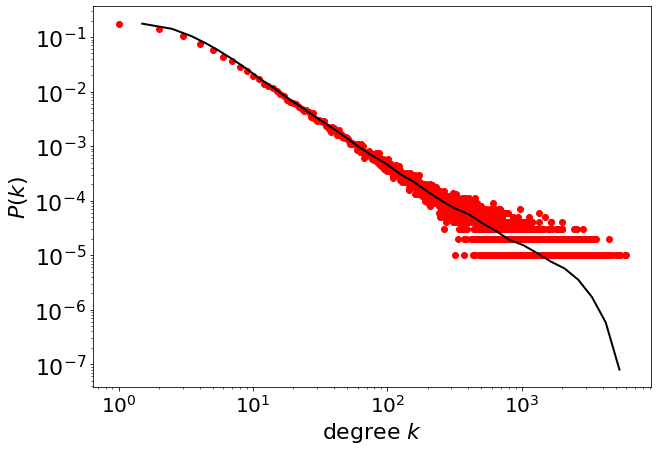

In [12]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'ro')

    pwl.plot_pdf(degree[j], color='black', linewidth=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)

    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

### Linear Binning

We can evaluate the density funtion using bin with same height in a linear scale. This is important because we can understand that the density function depends only on the binning that we have chosen.

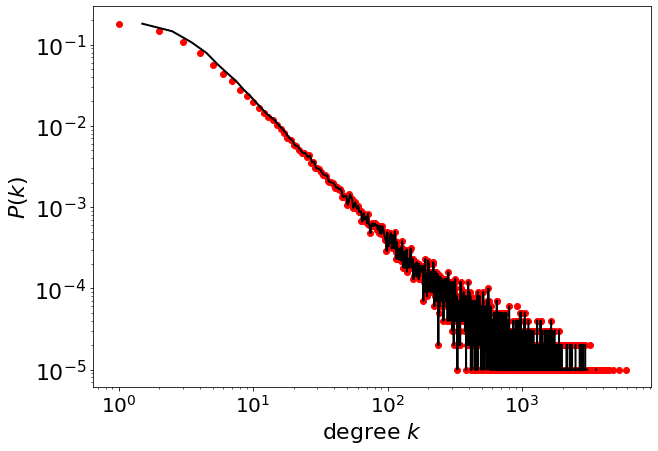

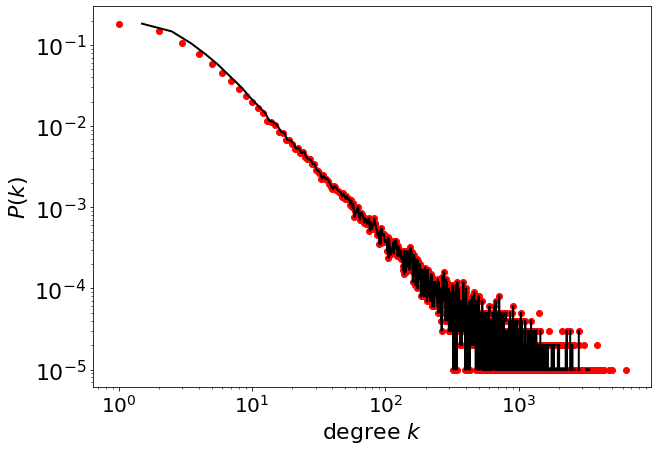

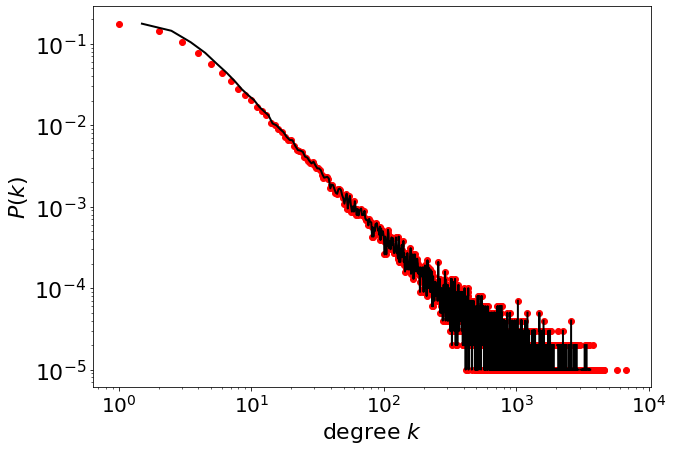

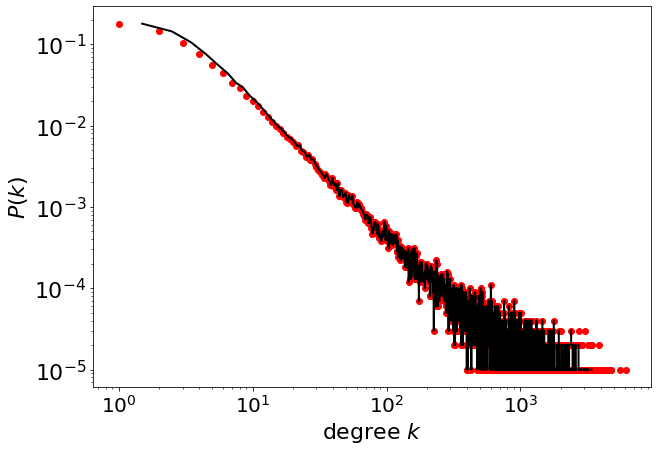

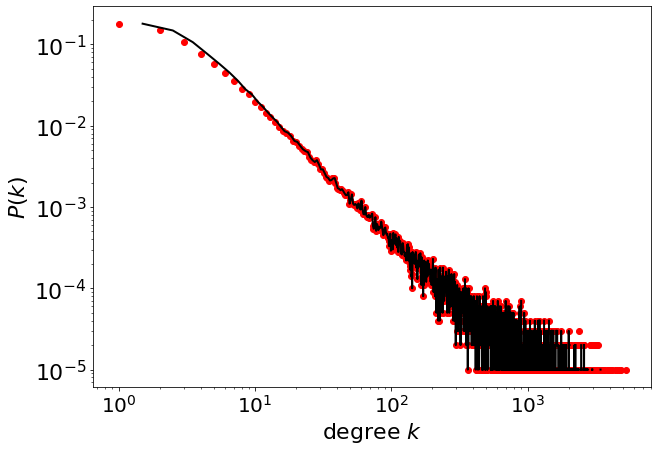

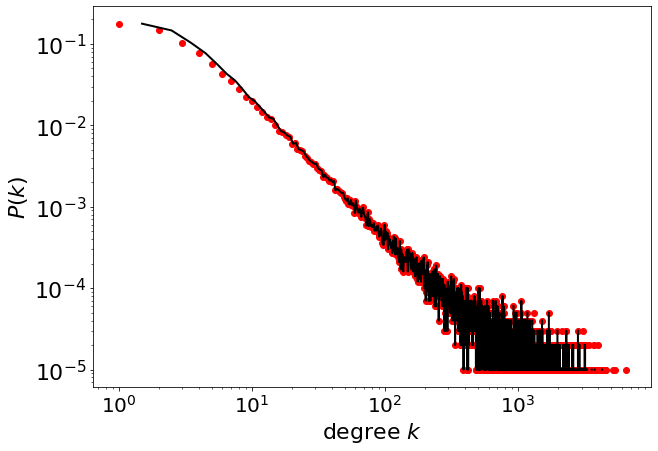

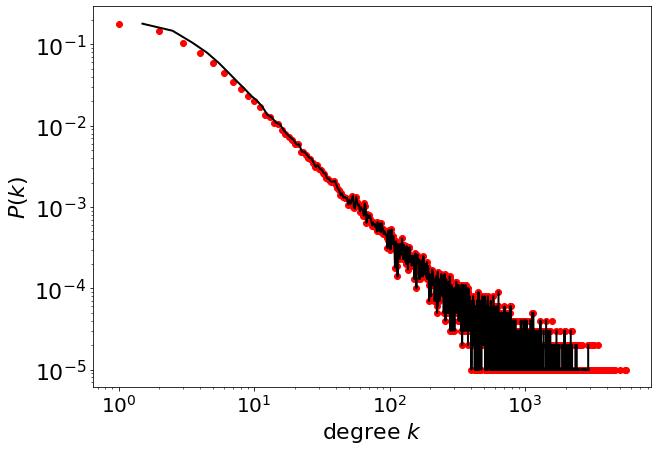

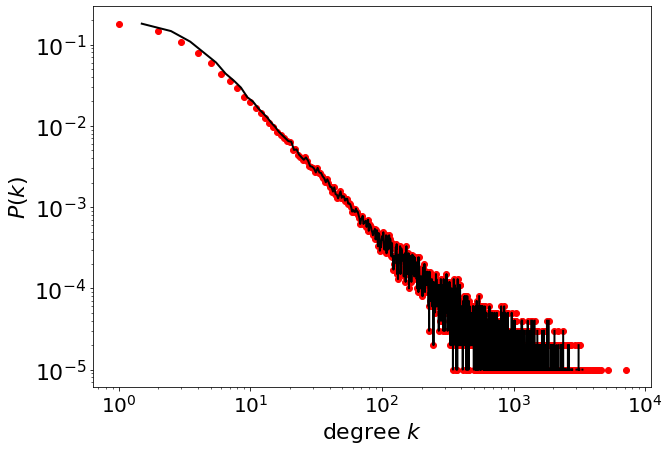

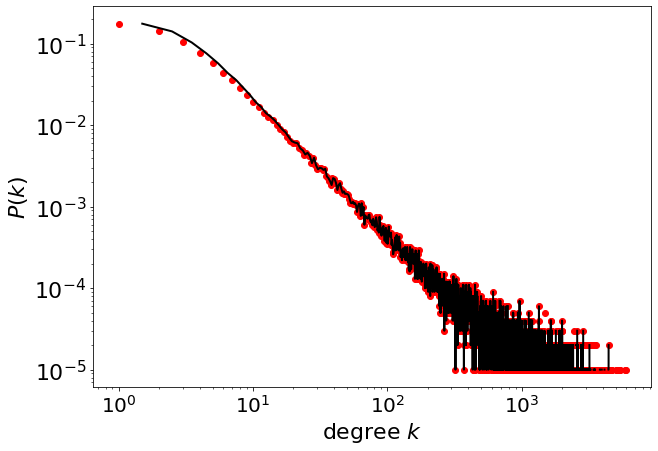

In [13]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'ro')

    pwl.plot_pdf(degree[j], linear_bins=True, color='black', linewidth=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)

    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

## Parameter estimation

$p(x) \propto x^{-\alpha}$

For our study it's important to notice that just few empirical phenomena obey power laws for all values of $x$. More often the power law applies only for values grater than some minimum $x_{min}$. In such cases we say that the tail of the distribution follows a power law.
The library powerlaw allows to estimate the exponent $\alpha$ and the minimum value for the scaling $x_{min}$. In real networks the exponent is between 2 and 3.

In [14]:
fit_function = {}
power_law_alpha = []
j = 0

for filename in all_files:
    fit_function[j] = pwl.Fit(degree[j])
    
    print(fit_function[j].power_law.alpha, '+-', fit_function[j].sigma)
    print(fit_function[j].power_law.xmin)
    power_law_alpha.append(fit_function[j].power_law.alpha)    
    j += 1

Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.7239655819060726 +- 0.003042033310416977
4.0


Calculating best minimal value for power law fit


1.7385311060443165 +- 0.003345058787376547
5.0


Calculating best minimal value for power law fit


1.7031854582174208 +- 0.002934630415439092
4.0


Calculating best minimal value for power law fit


1.7038691453426393 +- 0.0031563004110827055
5.0


Calculating best minimal value for power law fit


1.7356080719355713 +- 0.0033275555681108824
5.0


Calculating best minimal value for power law fit


1.6972483666093536 +- 0.0029125427011214913
4.0


Calculating best minimal value for power law fit


1.726320920851727 +- 0.00304846056958702
4.0


Calculating best minimal value for power law fit


1.7336006047898702 +- 0.0030876748071169153
4.0


Calculating best minimal value for power law fit


1.6820420708193335 +- 0.002833198153095174
4.0


In [15]:
print(mean(power_law_alpha), '+-', std(power_law_alpha))

1.7160412585018117 +- 0.018820792049710558


We can look at the values of the [Kolgomorov-Sminorv distance](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) of the two fits to compare them. Smaller distances correspond to better fits.

In [16]:
j = 0
fit_function_fixmin = {}

for filename in all_files:
    fit_function_fixmin[j] = pwl.Fit(degree[j], xmin=3)
    print('The exponent is:', fit_function_fixmin[j].power_law.alpha, '+-', fit_function_fixmin[j].sigma)
    print('The Distances are:')
    print('Without rescaling ->', fit_function[j].power_law.D)
    print('With rescaling ->', fit_function_fixmin[j].power_law.D)
    print('\n')
    j += 1

The exponent is: 1.7116399164796545 +- 0.0027438022899013196
The Distances are:
Without rescaling -> 0.01688182392429699
With rescaling -> 0.03013012769714335


The exponent is: 1.7185288879239669 +- 0.0027779308902686024
The Distances are:
Without rescaling -> 0.017199817037429233
With rescaling -> 0.03581226338346166


The exponent is: 1.6913395034486627 +- 0.0026537429155973112
The Distances are:
Without rescaling -> 0.01652658907208493
With rescaling -> 0.029510673522057107


The exponent is: 1.6894819449492853 +- 0.0026494639236803526
The Distances are:
Without rescaling -> 0.017058214792799675
With rescaling -> 0.031676281642188664


The exponent is: 1.7173339578210647 +- 0.002768638804232904
The Distances are:
Without rescaling -> 0.01792860593558443
With rescaling -> 0.03479843087299456


The exponent is: 1.6852646177383546 +- 0.0026351848899849903
The Distances are:
Without rescaling -> 0.016127875593799634
With rescaling -> 0.029225182119409776


The exponent is: 1.7120604842

### PowerLaw with Statistics

In [17]:
sum_all = Counter()

for i in range (len(G)):
    sum_all += deg_distri[i]

In [18]:
x_final = []
count_final = []
y_final = []
j = 0

for i in sorted(sum_all):   
    x_final.append(i)
    count_final.append(sum_all[i])
    y_final.append(sum_all[i]/len(G)/len(G[0]))

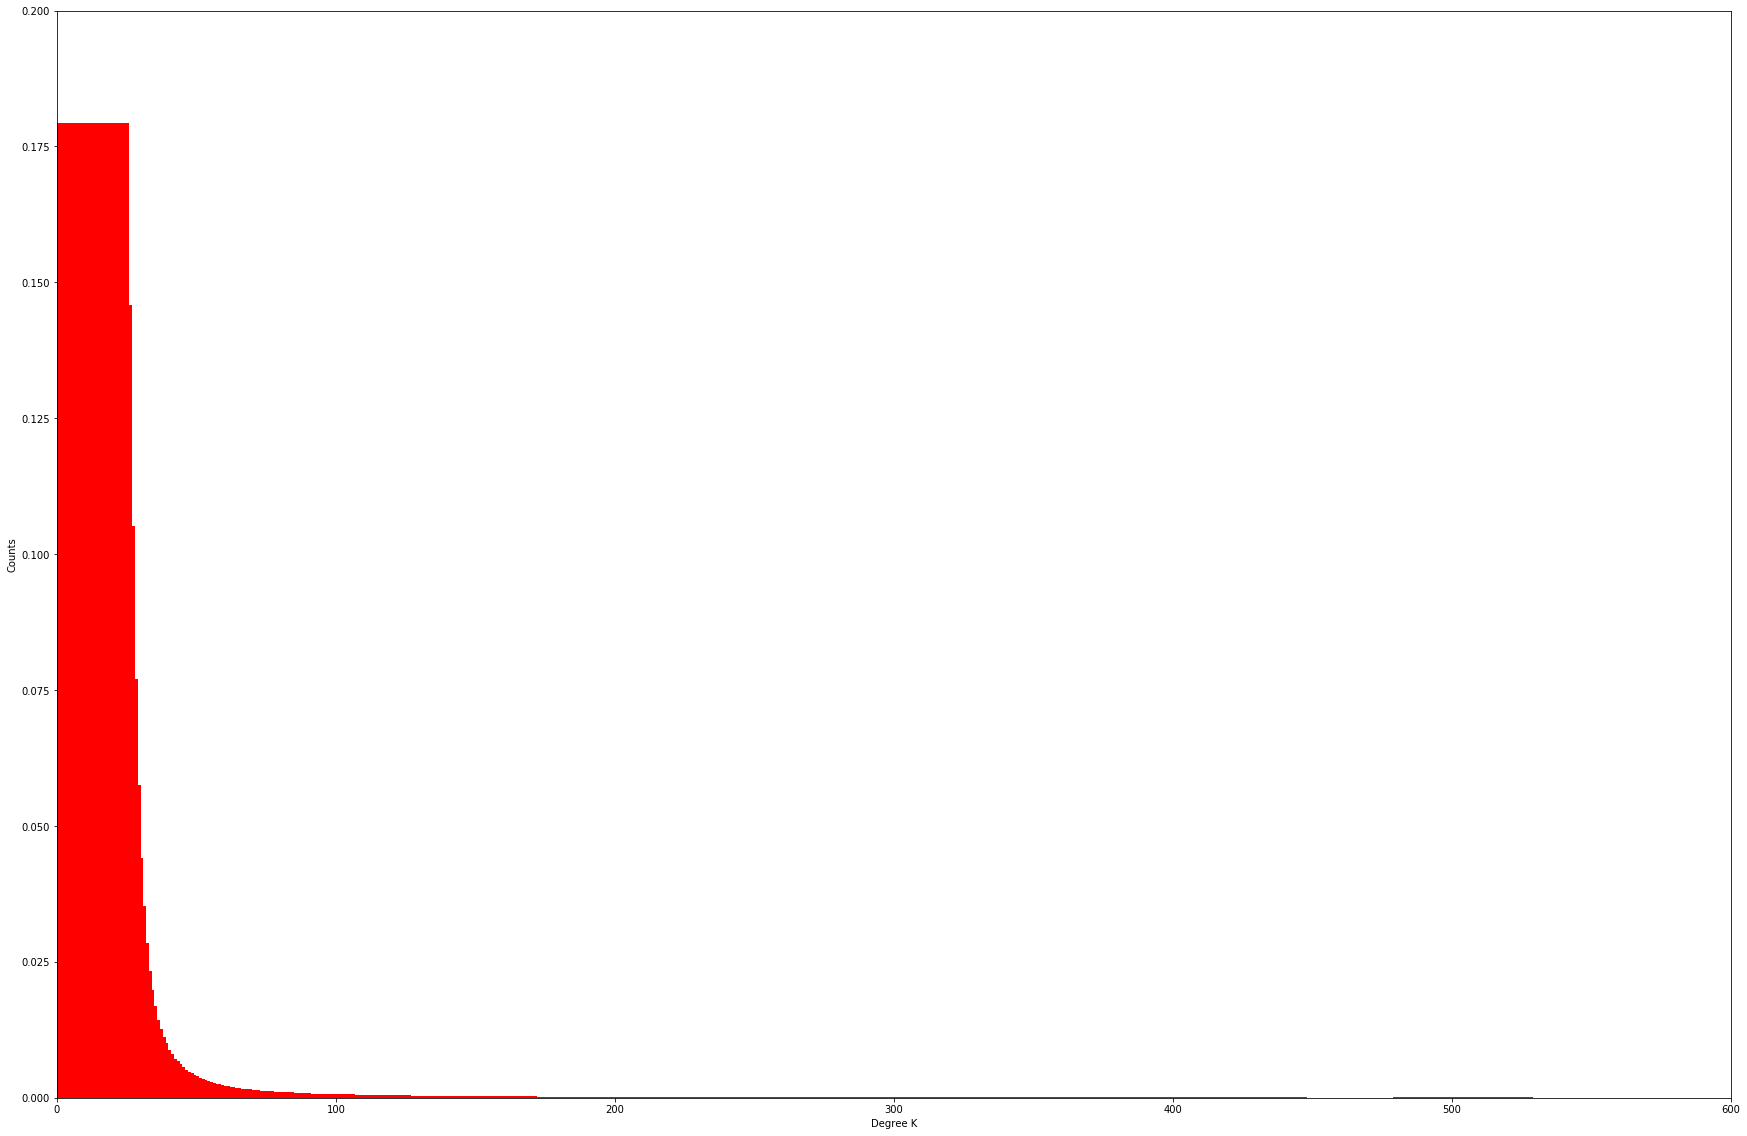

In [19]:
plt.figure(figsize=(30,20))

plt.bar(x_final, y_final, width=50, color='r')
plt.xlabel('Degree K')
plt.ylabel('Counts')
plt.xlim(0,600)
plt.ylim(0,0.200)
plt.show()

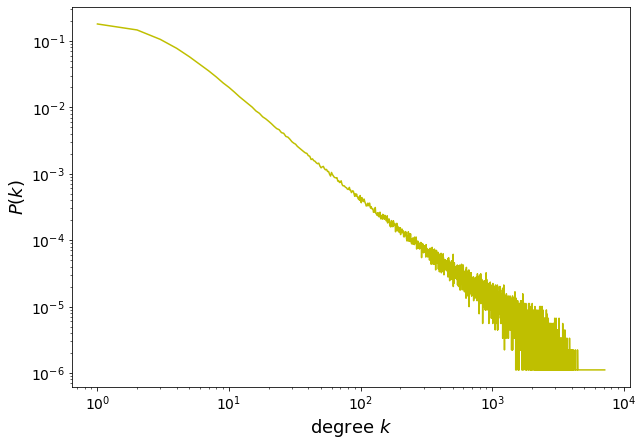

In [20]:
plt.figure(figsize=(10,7))    
plt.plot(x_final,y_final,'y')

plt.xlabel('degree $k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.show()

In [21]:
sum_final = []

for key, value in sum_all.items():
    if value > 1:
        for i in range (value):
            sum_final.append(key)
    else:
        sum_final.append(key)

In [22]:
fit_function_final = pwl.Fit(sum_final)
fit_function_final
fit_function_final.power_law

Calculating best minimal value for power law fit


In [23]:
print('The exponent is:',fit_function_final.power_law.alpha, '+-', fit_function_final.sigma)
print('The Xmin is:',fit_function_final.power_law.xmin)

The exponent is: 1.713892130586275 +- 0.0009970502137064303
The Xmin is: 4.0


We fix the minimum value for the scaling $x_{min}=3$

In [24]:
fit_function_fixmin = pwl.Fit(sum_final, xmin=3)

In [25]:
print('The new Xmin is:',fit_function_fixmin.xmin)
print('The exponent is:', fit_function_fixmin.power_law.alpha, '+-', fit_function_fixmin.sigma)
print('The Distances are:')
print('Without rescaling ->',fit_function_final.power_law.D)
print('With rescaling ->',fit_function_fixmin.power_law.D)

The new Xmin is: 3.0
The exponent is: 1.7016920915514273 +- 0.0009003536314990532
The Distances are:
Without rescaling -> 0.01592843906405228
With rescaling -> 0.03100067232317144
